In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler

## Load & Understand the Data
**************************

In [97]:
x =np.array([50, 60, 70, 80, 90])
y =np.array([150, 180, 210, 240, 270]) # house price in thousands

- x represent input feature (independent variable)

- y represent the target feature (dependent variable)

## Create and Train the Model
*******************************

In [ ]:
class LinearRegressionGD:
     def __init__(self,learning_rate=0.001, n_iters=100):
          self.learning_rate=learning_rate
          self.n_iters=n_iters
          self.theta_0=0
          self.theta_1=0
          self.sse_value=[]
          
     def fit(self, X, y):
        n_samples = len(X)
        
        for i in range(self.n_iters):
            y_pred = self.theta_0 + self.theta_1 * X
            
            
            d_theta_0 = (2/n_samples) * np.sum(y_pred - y)
            d_theta_1 = (2/n_samples) * np.sum(X * (y_pred - y))
            
            
            self.theta_0 -= self.learning_rate * d_theta_0
            self.theta_1 -= self.learning_rate * d_theta_1

            sse=np.sum((y_pred-y)**2)
            self.sse_value.append(sse)

     def predict(self, X):
         return self.theta_0 + self.theta_1 * X
     
     def plot_training(self, X, y):
        
        
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(range(self.n_iters),self.sse_value,label='sse')
        plt.xlabel("Iterations")
        plt.ylabel("SSE")
        plt.title("SSE over Iterations")
        plt.legend()
        
       
        plt.subplot(1,2,2)
        plt.scatter(X, y)
        y_pred = self.predict(np.array(X))
        plt.plot(X, y_pred)
        plt.xlabel("House Size (m²)")
        plt.ylabel("Price (thousands)")
        plt.title("Regression Line")
        plt.show()

     def calc_MSE(self,x,y):
         y_pred= self.theta_1 * x + self.theta_0
         return mean_squared_error(y,y_pred)

          

-5.129504697834747e+98


In [109]:
modl=LinearRegressionGD(learning_rate=0.001,n_iters=100)
modl.fit(x, y)

print("theta_0:", modl.theta_0)
print("theta_1:", modl.theta_1)


theta_0: -1.0055957901462392e+95
theta_1: -7.326427288635144e+96


- theta_0 represent intercept

- theta_1 represent slope

## Prediction
*********************

In [110]:
modl.predict(70)

np.float64(-5.129504697834747e+98)

isn't reasonable because the learning rate is  big and the number of iteration is small

## Visualization

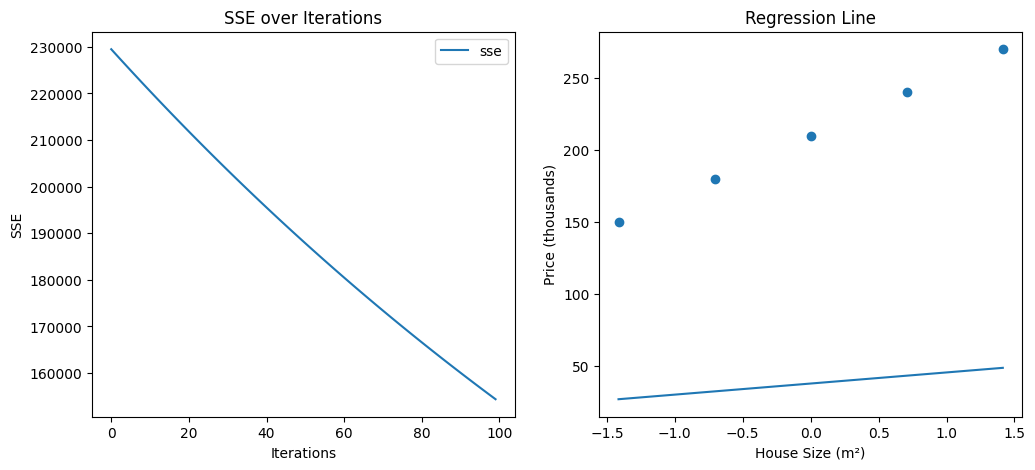

In [ ]:
modl.plot_training(x,y)

- Why SSE decreases over time?

 because as the time pass the model learn more and the predicted values get closer to the true values so the sse decrease


- What convergence means in Gradient Descent?

 convergence means the algorithm has reached the minimum error, and further updates do not significantly change the parameter

### Experimentation

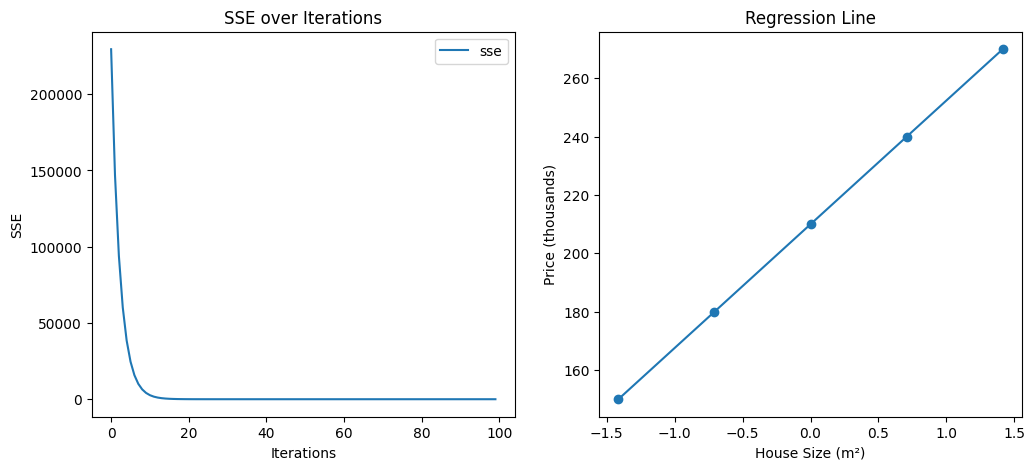

In [ ]:
model_large = LinearRegressionGD(learning_rate=0.1, n_iters=100)
model_large.fit(x, y)
model_large.plot_training(x, y)


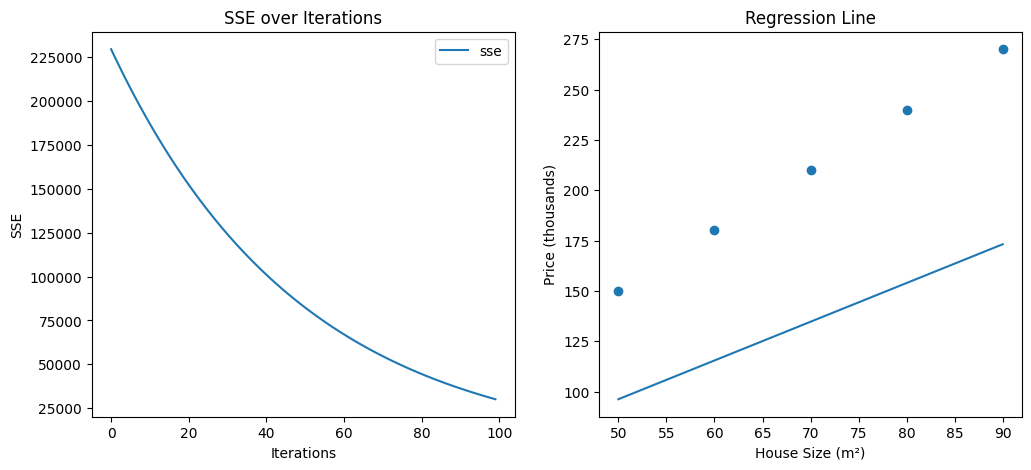

In [115]:
model_small = LinearRegressionGD(learning_rate=1e-6, n_iters=100)
model_small.fit(x, y)
model_small.plot_training(x, y)


what happen if the learning rate is too large:

SSE increases instead of decreasing.

Parameters become extremely large.

The algorithm diverges.

The model fails to converge.

